<a href="https://colab.research.google.com/github/solobala/FEML23/blob/master/FEML3_gradient_descent_Ponomareva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://bit.ly/FEML-3-GD

## Градиентный спуск

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

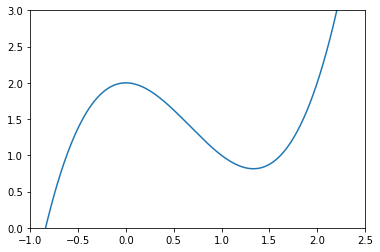

In [ ]:
f = lambda x: x**3 - 2 * x**2 + 2
x = np.linspace(-1, 2.5, 1000)
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

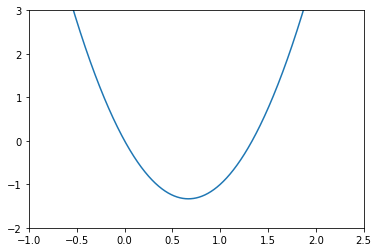

In [ ]:
f_prime = lambda x: 3 * x**2 - 4 * x
x = np.linspace(-1, 2.5, 1000)
plt.plot(x, f_prime(x))
plt.xlim([-1,2.5])
plt.ylim([-2,3])
plt.show()

## Метод градиентного спуска

In [ ]:
lr = 0.1
points = [2]
n_epochs = 15

In [ ]:
for _ in range(n_epochs):
    cur_point = points[-1]
    grad = f_prime(cur_point)
    new_point = cur_point - lr * grad
    points.append(new_point)

In [ ]:
y_points = [f(p) for p in points]

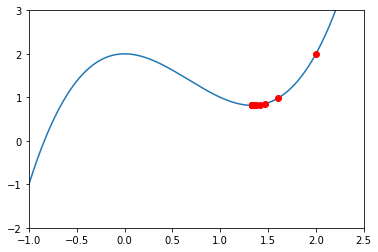

In [ ]:
plt.plot(x,f(x))
plt.plot(points, y_points, 'ro')
plt.xlim([-1,2.5])
plt.ylim([-2,3])
plt.show()

## Практический пример

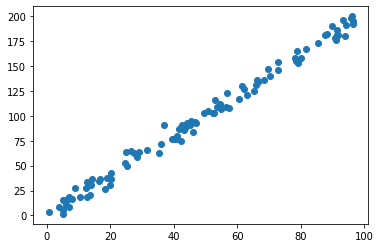

In [ ]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

## Применим метод градиентного спуска

In [ ]:
EPOCHS = 20
LEARNING_RATE = 0.0001

In [ ]:
def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        pred = theta0 + theta1 * X[i]
        total_cost += (pred - y[i]) ** 2
    return total_cost / len(X)

$$Loss = (θ_0 + θ_1 * x - y)^2 $$

$$\frac{dLoss}{dθ_0} = 2 \cdot (θ_0 + θ_1 * x - y) \cdot 1 $$


$$\frac{dLoss}{dθ_1} = 2 \cdot (θ_0 + θ_1 * x - y) \cdot x $$

In [ ]:
def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        pred = theta0 + theta1 * X[i]
        total_cost += 2 * (pred - y[i])
    return total_cost / len(X)

In [ ]:
def der_theta1(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        pred = theta0 + theta1 * X[i]
        total_cost += 2 * (pred - y[i]) * X[i]
    return total_cost / (len(X))

In [ ]:
theta0 = 1
theta1 = 1

for _ in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)

    theta0 = theta0 - LEARNING_RATE * dt0
    theta1 -= LEARNING_RATE * dt1

    print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))

t0: 1.0096264979002953 t1: 1.6334874467932767 cost: 462.92597226483093
t0: 1.013165130309258 t1: 1.8673240380285874 cost: 88.52441113438259
t0: 1.0144565771552714 t1: 1.9536393099196296 cost: 37.51083461413318
t0: 1.0149185313126818 t1: 1.98550070197666 cost: 30.560044908152474
t0: 1.015074299363487 t1: 1.9972617787485536 cost: 29.612969855706424
t0: 1.0151170471080369 t1: 2.0016033167069116 cost: 29.48392271902273
t0: 1.0151180769676935 t1: 2.003206113726258 cost: 29.466334855840778
t0: 1.0151037084838956 t1: 2.0037979716325474 cost: 29.46393372378157
t0: 1.015083656870326 t1: 2.004016666127659 cost: 29.46360183947294
t0: 1.0150615082599885 t1: 2.0040976164823654 cost: 29.463551898188413
t0: 1.015038586385956 t1: 2.004127721951199 cost: 29.463540373170986
t0: 1.0150153798718096 t1: 2.0041390592643835 cost: 29.46353408301595
t0: 1.0149920690809278 t1: 2.004143468760798 cost: 29.463528506636397
t0: 1.014968720589989 t1: 2.0041453210113764 cost: 29.463523028017736
t0: 1.0149453589741004 

In [ ]:
cost_function(X,Y,10,10)

208638.10857124915

$$Loss = \frac{1}{n}||Xw - Y||^{2}$$


где используется $L_{2}$ норма:

$$||X w - Y|| = \sqrt{\sum_{i=1}^n{(X_iw - y_i)^2}} $$

$$MSE = \frac{1}{n}\sqrt{\sum_{i=1}^n{(X_iw - y_i)^2}} ^{2} = \frac{1}{n}\sum_{i=1}^n{(X_iw - y_i)^2}$$

Градиент:

$$\frac{∂ MSE}{∂ w_0} = \frac{2}{n}\sum{({Xw - y})}$$

$$\frac{∂ MSE}{∂ w} = \frac{2}{n}\sum{({Xw - y}) \cdot X}$$


In [ ]:
EPOCHS = 20
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
np.random.seed(9)
params = np.random.normal(size=(2,))
print(params)

list_params_gd = [params.copy()]
for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum((predictions - Y) ** 2) / len(predictions)
    costs.append(cost)

    params[0] -= LEARNING_RATE * np.sum(predictions - Y) * (2/len(predictions))
    params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X) * (2/len(predictions))

    list_params_gd.append(params.copy())

[ 0.00110855 -0.28954407]


In [ ]:
costs[-1]

29.491618312060513

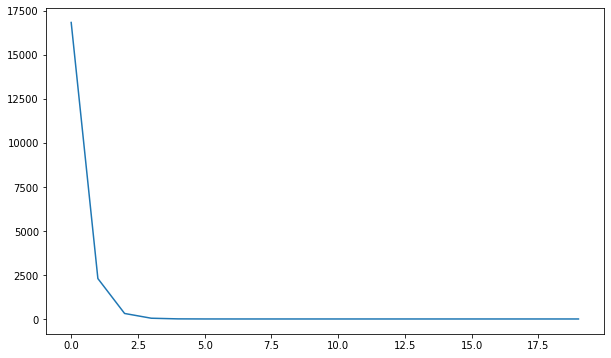

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(costs)
plt.show()

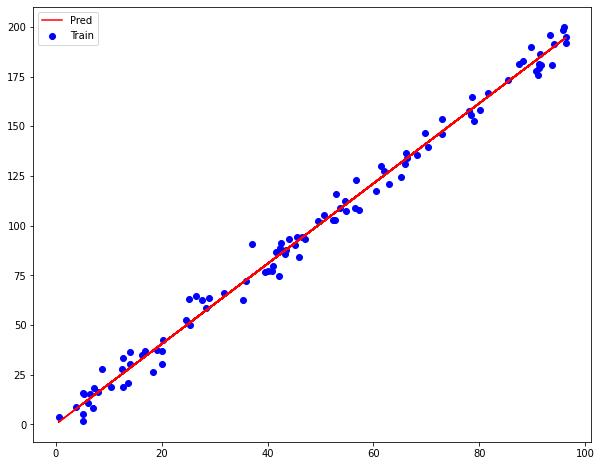

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X, Y, color='blue', label='Train')
plt.plot(X, preds[10], color='red', label='Pred')
plt.legend()
plt.show()

In [ ]:
params

array([0.03685792, 2.01904572])

## Метод стохастического градиентного спуска

In [ ]:
EPOCHS = 100
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
np.random.seed(9)
params = np.random.normal(size=(2,))
print(params)
list_params_sgd = [params.copy()]

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum((predictions - Y) ** 2) / len(predictions)
    costs.append(cost)

    i = np.random.choice(len(X))
    current_prediction = params[0] + params[1] * X[i]

    params[0] -= LEARNING_RATE * np.sum(current_prediction - Y[i]) * 2
    params[1] -= LEARNING_RATE * np.sum((current_prediction - Y[i]) * X[i]) * 2

    list_params_sgd.append(params.copy())

[ 0.00110855 -0.28954407]


In [ ]:
costs[-1]

39.08007084421647

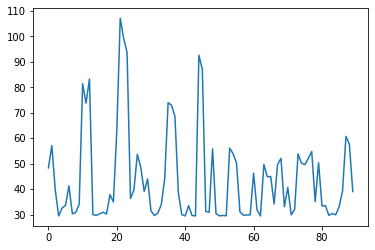

In [ ]:
plt.plot(costs[10:])
plt.show()

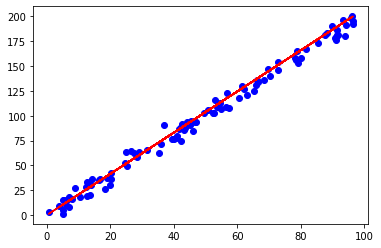

In [ ]:
plt.scatter(X, Y, color='blue')
plt.plot(X, preds[-1], color='red')
plt.show()

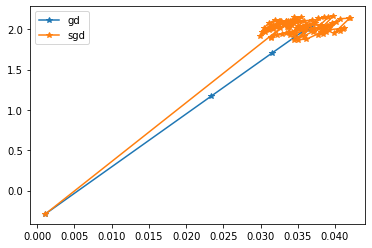

In [ ]:
list_params_sgd = np.array(list_params_sgd)
list_params_gd = np.array(list_params_gd)

plt.plot(list_params_gd[:, 0], list_params_gd[:, 1], marker='*', label='gd')
plt.plot(list_params_sgd[:, 0], list_params_sgd[:, 1], marker='*', label='sgd')
plt.legend()
plt.show()

## **Дополнительные материалы**
1. Методы оптимизации нейронных сетей https://habr.com/ru/post/318970/
2. Реализация линейной регрессии https://www.youtube.com/watch?v=KJA9A1q9l7E
3. Реализация логистической регрессии https://youtu.be/ruVK07YF-RU
4. Метод сопряжённых градиентов (Newton conjugate gradient method) http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D1%81%D0%BE%D0%BF%D1%80%D1%8F%D0%B6%D1%91%D0%BD%D0%BD%D1%8B%D1%85_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2
